Спектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)

Saddle point:  3
 | 1 | 2 | 
 | 3 | 4 | 

 Price оf the game:  3

 | p || 0 | 1 | 
 | q || 1 | 0 | 




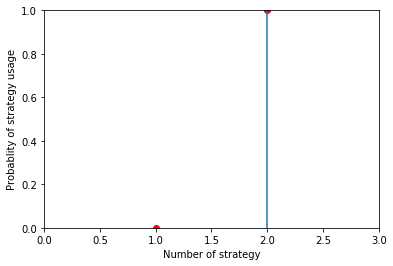

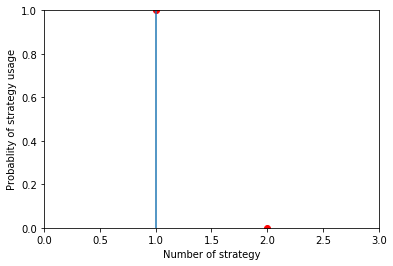

Спектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)

No saddle point
 |  4 | 0 | 6 |  2 |  2 | 1 | 
 |  3 | 8 | 4 | 10 |  4 | 4 | 
 |  1 | 2 | 6 |  5 |  0 | 0 | 
 |  6 | 6 | 4 |  4 | 10 | 3 | 
 | 10 | 4 | 6 |  4 |  0 | 9 | 
 | 10 | 7 | 0 |  7 |  9 | 8 | 

 Price оf the game:  151/31

 | p || 0 | 4/31 |    3/31 | 27/62 |  21/62 |    0 | 
 | q || 0 |    0 | 257/372 |  9/62 | 55/372 | 1/62 | 




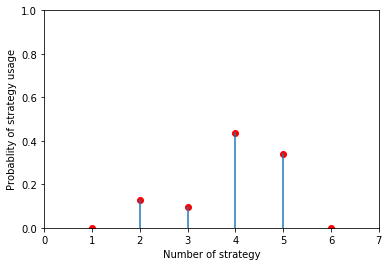

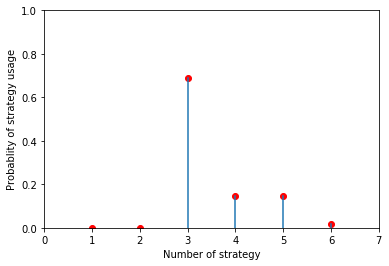

Спектр оптимальной стратегии полон

No saddle point
 | 3 | 6 | 1 |  4 | 
 | 5 | 2 | 4 |  2 | 
 | 1 | 4 | 3 |  5 | 
 | 4 | 3 | 4 | -1 | 

 Price оf the game:  339/104

 | p || 1/8 |  25/52 | 19/52 | 3/104 | 
 | q || 1/8 | 37/104 | 23/52 |  1/13 | 




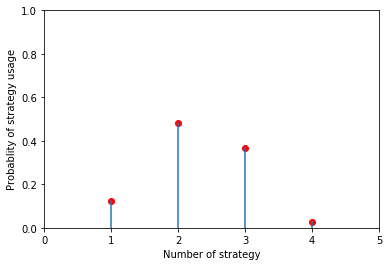

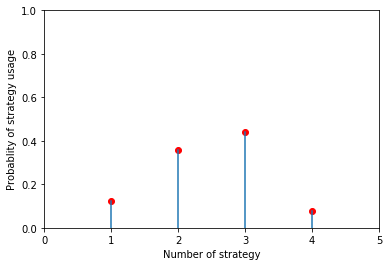

(array([1/8, 25/52, 19/52, 3/104]),
 array([1/8, 37/104, 23/52, 1/13]),
 '339/104')

In [7]:
import numpy as np
import itertools as it                      # Для комбинаций матрицы (в какой-то момент мы все ленимся)
from math import factorial                  # И ленимся даже не в один момент
import re                                   # Распарсивать знаки неравенств
from fractions import Fraction as frc       # Float -> Обыкновенные дроби
import matplotlib.pyplot as plt             # Визуализация
%matplotlib inline

# Красивый вывод, как в задании
def correct_output(a, s1, s2, price):
    r, c = a.shape                          # Размеры матрицы
    ldconst = 1000                          # Максимальное значение в знаменателе
    ssize = max(s1.size, s2.size)           # Наибольшая длина (при прямоугольной игровой матрице)
    l_s = np.ones(ssize, dtype = 'int')     
    l_a = np.ones(c, dtype = 'int')
    if s1.size < s2.size:
        for i in range(s1.size):
            if len(str(frc(s1[i]).limit_denominator(ldconst))) > len(str(frc(s2[i]).limit_denominator(ldconst))):
                l_s[i] = len(str(frc(s1[i]).limit_denominator(ldconst)))
            else: 
                l_s[i] = len(str(frc(s2[i]).limit_denominator(ldconst)))
        for i in range(s1.size, s2.size):
            l_s[i] = len(str(frc(s2[i]).limit_denominator(ldconst)))
    elif s1.size > s2.size:
        for i in range(s2.size):
            if len(str(frc(s1[i]).limit_denominator(ldconst))) > len(str(frc(s2[i]).limit_denominator(ldconst))):
                l_s[i] = len(str(frc(s1[i]).limit_denominator(ldconst)))
            else: 
                l_s[i] = len(str(frc(s2[i]).limit_denominator(ldconst)))
        for i in range(s2.size, s1.size):
            l_s[i] = len(str(frc(s1[i]).limit_denominator(ldconst)))		    
    else:
        for i in range(ssize):
            if len(str(frc(s1[i]).limit_denominator(ldconst))) > len(str(frc(s2[i]).limit_denominator(ldconst))):
                l_s[i] = len(str(frc(s1[i]).limit_denominator(ldconst)))
            else:
                l_s[i] = len(str(frc(s2[i]).limit_denominator(ldconst)))
    for j in range(c):
        for i in range(r):
            if len(str(a[i][j])) > l_a[j]:
                l_a[j] = len(str(a[i][j]))
    for i in range(r):
        print(end=" | ")
        for j in range(c):
            print(str(a[i][j]).rjust(l_a[j]), end=" | ")
        print()
    print ("\n Price оf the game: ", frc(price).limit_denominator(ldconst))
    print("\n | p || ", end="")
    for i in range(0, r):
        print(str(frc(s1[i]).limit_denominator(ldconst)).rjust(l_s[i]),end=" | ")
    print("\n | q || ", end="")
    for i in range(0, c):
        print(str(frc(s2[i]).limit_denominator(ldconst)).rjust(l_s[i]),end=" | ")
    print("\n\n")

# Визуализация
def spectre_vizual(s):
    v = np.arange(1, np.size(s)+1)
    plt.plot(v, s, 'ro')
    plt.axis([0, np.size(s)+1, 0, 1])
    for i in v:
        plt.axvline(x = i, ymax = s[i-1])
    plt.ylabel("Probablity of strategy usage")
    plt.xlabel("Number of strategy")    
    plt.show()

# Количество всевозможных перестановок
def permutation(m, n):
    return factorial(n) / (factorial(n - m) * factorial(m))

# Доработанный библиотечный combinations для нашего случая
def combinations(matr, n):
    timed = list(map(list, it.combinations(matr, n)))
    return np.array(list(timed))

# Проверка крайних точек на удовлетворение всей системе многогранника
def check_extreme(matr, arr, x, sym_comb, m):
    sym_comb = sym_comb.replace(']', '')             # Убираем левую скобку знаков неравенств
    sym_comb = sym_comb.replace('[', '')             # Убираем правую скобку знаков неравенств
    sym_comb = re.split("[ ,]", sym_comb)            # Из строки получаем вектор знаков неравенств
    for i in range(int(m)):                          # m - кол-во неравенств
        td_answer = float("{0:.7f}".format(KahanSum(matr[i] * x)))
        # Умножаем i-ю строку матрицы на решение, а дальше проверяем удовлетворяет ли
        # оно неравенству с правой частью. Также округляем float на 7-х знаках, чтобы питон не бузил
        if sym_comb[i] == '>':
            if td_answer <= arr[i]:
                return 0
        elif sym_comb[i] == '>=':
            if td_answer < arr[i]:
                return 0
        elif sym_comb[i] == '<':
            if td_answer >= arr[i]:
                return 0
        elif sym_comb[i] == '<=':
            if td_answer > arr[i]:
                return 0
        elif sym_comb[i] == '=':
            if td_answer != arr[i]:
                return 0
        elif sym_comb[i] == '!=':
            if td_answer == arr[i]:
                return 0
        else:
            return 0
    return 1

# Поиск крайних точек канонического многогранника
def extreme_points(A, b, sym_comb):
    # Подготовка
    m, n = A.shape                                        # Размер левой части - строки/столбцы
    # Обработка
    ans_comb = np.zeros((1, n))                           # Создаём единичный нулевой вектор, где будем хранить ответы
    arr_comb = combinations(b, n)                         # Всевозможные комбинации правой части
    matr_comb = combinations(A, n)                        # Соответствующие им комбинации левой части
    for i in range(int(permutation(n, m))):               # Количество перестановок (C^m)_n
        if np.linalg.det(matr_comb[i]) != 0:              # Если определитель равен нулю -> решений нет
            x = np.linalg.solve(np.array(matr_comb[i], dtype='float'),
                                np.array(arr_comb[i], dtype='float'))  # Поиск решения матрицы nxn для иксов
            ans_comb = np.vstack([ans_comb, x])           # Записываем наше решение
    ans_comb = np.delete(ans_comb, 0, axis=0)             # Удаляем наш нулевой вектор (см. строка 56)
    j = 0                                                 # Счётчик успешной проверки
    for i in range(len(ans_comb)):
        if check_extreme(A, b, ans_comb[j], sym_comb, m): # Проверка - является ли решение частной системы - решением общей
            j += 1                                        # Если да, то идём дальше
        else:
            ans_comb = np.delete(ans_comb, j, axis=0)     # Если нет, то удаляем решение
    # Вывод
    return ans_comb

# Функция для решения игры с седловыми точками
def fixed_solution(mtr, mins, maxs, price):
    rows, columns = mtr.shape
    A_points = np.zeros(rows, dtype='int')            # Векор с вероятностями стратегий игрока А
    B_points = np.zeros(columns, dtype='int')         # Векор с вероятностями стратегий игрока В
    strategies = np.zeros((2,1), dtype='int')         # Матрица с координатами стратегий
    strat_point = 0                                   # Количество седловых точек в игре
    for i in range(rows):
        for j in range(columns):
            if mtr[i,j] == mins[i] and mtr[i,j] == maxs[j] and mtr[i,j] == price:
                strategies[0,strat_point] = i         # Координата строки с седловой точкой
                strategies[1,strat_point] = j         # Кордината столбца с седловой точкой
                strat_point += 1
                strategies = np.concatenate((strategies, np.zeros((2,1), dtype='int')), axis=1)
                A_points[i] = 1                       # Eсли на позиции i есть седловая точка, то записываем 1
                B_points[j] = 1                       # Eсли на позиции j есть седловая точка, то записываем 1
    strategies = strategies[0:2,0:strat_point]        # Отсекаем лишний последний столбец
    # Вывод
    return A_points/np.sum(A_points), B_points/np.sum(B_points), mtr[strategies[0,0],strategies[1,0]]

# Функция для решения игры в смешанных стратегиях
def mixed_solution(a1):
    # Добавляем к игровой матрице условия неотрицательности каждой неизвестной
    a1 = np.concatenate((a1,np.eye(np.size(np.array(a1, dtype = float),1))), axis = 0)
    m1,n1 = (np.array(a1)).shape                      # Получаем размеры полученной матрицы
    # Транспонируем
    atrans = np.transpose(np.array(a1)[:-n1, :])      # Случай общий
    m2,n2 = atrans.shape                              # Случай не квадратной матрицы
    a2 = np.concatenate((atrans, np.eye(n2, dtype = float)), axis=0)
    # Составляем правую часть для матричной игры
    b1 = np.concatenate((np.ones(m1-n1),np.zeros(n1)), axis = 0)
    b2 = np.concatenate((np.ones(m2),np.zeros(n2)), axis = 0)
    # Составление знаков неравенств в зависимости от размерности input // [.] - для красоты
    c1 = '['+('<=,'*(m1-n1)+'>=,'*(n1))[:-1]+']'      # Максимизация
    c2 = '['+('>=,'*(m2+n2))[:-1]+']'                 # Минимизация
    max_points = extreme_points(a1, b1, c1)           # Массив, где надо найти максимум
    min_points = extreme_points(a2, b2, c2)           # Массив, где надо найти минимум
    max_size = np.size(max_points,0)                  # Размер массива с максимумом (только строки)
    min_size = np.size(min_points,0)                  # Размер массива с минимумом (только строки)
    # Поиск максимума
    max = KahanSum(max_points[0])
    max_solve = max_points[0]
    for i in range(1,max_size):
        if (KahanSum(max_points[i]) > max):
            max = KahanSum(max_points[i])             # Запомнили максимальную сумму
            max_solve = max_points[i]                 # Запомнили максимальный вектор
    # Поиск минимума
    min = KahanSum(min_points[0])
    min_solve = min_points[0]
    for i in range(1,min_size):
        if (KahanSum(min_points[i]) < min):
            min = KahanSum(min_points[i])             # Запомнили минимальную сумму
            min_solve = min_points[i]                 # Запомнили минимальный вектор
    # Вывод
    return np.true_divide(min_solve,max), np.true_divide(max_solve,max), 1/max

# Метод Кэхэна для аккуратной суммы float
def KahanSum(input):
    sum = 0.0
    c = 0.0
    for i in range(len(input)):                       # Перебор по каждой цифре числа
        y = input[i] - c                              # Сначала с = 0
        t = sum + y                 
        c = (t - sum) - y           
        sum = t
    return sum

# Основная функция
def nash_equilibrium(mtr):
    mtr = np.array(mtr)
    rows, columns = mtr.shape       	             # Получаем строки/столбцы матрицы
    mins = mtr.min(axis = 1).transpose()             # Получаем вектор с минимумами
    maxs = mtr.max(axis = 0)                         # Находим вектор со столбцами
    min = mins.max()                                 # Получаем максимум из минимумов
    max = maxs.min()                                 # Получаем минимум из максимумов
    if min == max:                                   # Если минимум равен максимуму, тогда седло
        print("Saddle point: ", min)
        p, q, price = fixed_solution(mtr, mins, maxs, min)
    else:                                            # Иначе (не) "симплекс"
        print("No saddle point")
        p, q, price = mixed_solution(mtr)
    correct_output(mtr, p, q, price)                 # Красивый вывод
    spectre_vizual(p)                                # Визуализация p
    spectre_vizual(q)                                # Визуализация q
    return p, q, str(frc(price).limit_denominator())

# Настройки, чтобы вывод был аккуратным
np.set_printoptions(precision=6,
                    suppress=True,
					formatter={'all':lambda x: str(frc(x).limit_denominator())})

# Ручные тесты для отладки
akr = [[3, 6, 1, 4],[5, 2, 4, 2],[1, 4, 3, 5],[4, 3, 4, -1]] # Тест из интернета

task_test_matrix = [[4, 0, 6, 2, 2, 1],[3, 8, 4, 10, 4, 4],
                    [1, 2, 6, 5, 0, 0],[6, 6, 4, 4, 10, 3],
                    [10, 4, 6, 4, 0, 9],[10, 7, 0, 7, 9, 8]] # Тест из задания прака

saddle_test = [[1, 2],[3, 4]]                                # Седловая точка

print("Спектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)\n")
nash_equilibrium(saddle_test)
print("Спектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)\n")
nash_equilibrium(task_test_matrix)
print("Спектр оптимальной стратегии полон\n")
nash_equilibrium(akr)
